<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da04_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 모듈 임포트

In [1]:
import numpy as np  # ndarray
import pandas as pd  # DataFrame
import matplotlib.pyplot as plt  # 시각화
import seaborn as sns  # 시각화, 예제 데이터셋

# 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# `matplotlib.pyplot` 모듈을 사용한 데이터 시각화

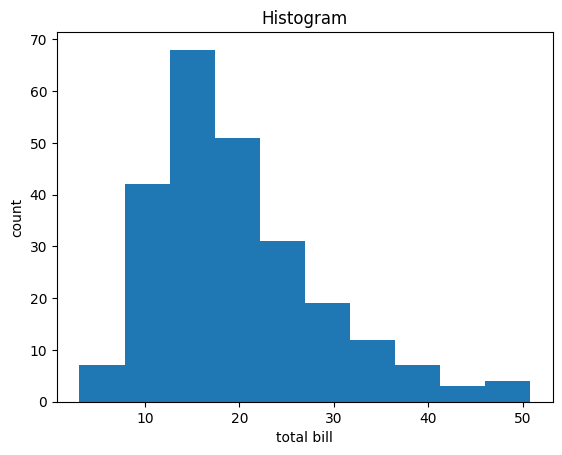

In [5]:
# 1. Figure 객체 생성
fig = plt.figure()

# 2. Figure 객체에 Axes 설정 - Subplot을 생성.
# axis = fig.add_subplot(1, 1, 1)  # add_subplot(nrows, ncols, index)
axis = fig.add_subplot(111)  # add_subplot(pos): '행/열/인덱스' 순서로 만들어진 3자리 정수.
#> add_subplot에서 인덱스는 1부터 시작!

# 3. Axis(축)에 그래프를 그림.
axis.hist(x=tips.total_bill)  # 히스토그램

# 4. 그래프 옵션 설정.
axis.set_title('Histogram')
axis.set_xlabel('total bill')
axis.set_ylabel('count')

# 5. 그래프 보여주기.
plt.show()

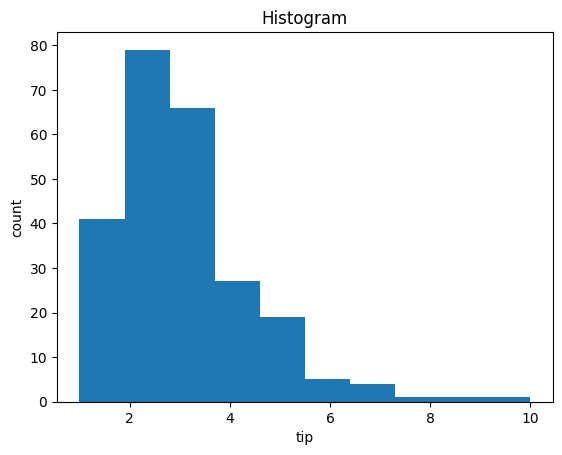

In [6]:
# 1. Figure, Axes 객체 생성.
fig, axis = plt.subplots()  # nrows, ncols 파라미터 기본값은 1.

# 2. 그래프 그림.
axis.hist(x=tips.tip)

# 3. 그래프 옵션 설정.
axis.set_title('Histogram')
axis.set_xlabel('tip')
axis.set_ylabel('count')

# 4. 그래프 보여주기.
plt.show()

1개의 Figure에 1개의 Axes(Subplot)만 있는 경우에는 `matplotlib.pyplot` 모듈의 top-level 함수(plot, scatter, hist, ...)를 사용해서 간단히 그래프를 그릴 수 있음.

top-level 함수를 사용할 때는 Figure, Axes 객체를 생성하는 코드를 작성할 필요가 없음.

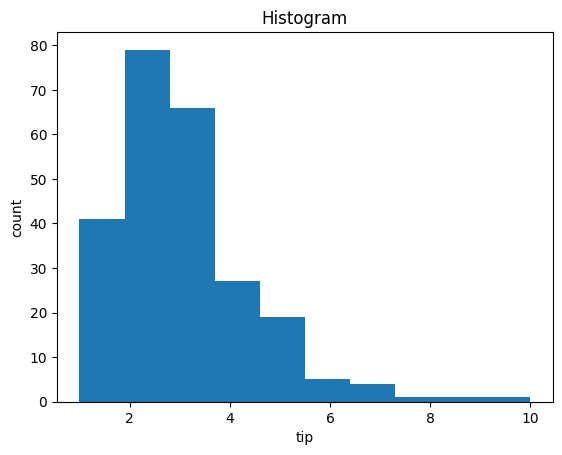

In [7]:
# Figure 객체 생성, Axes 객체 생성, 히스토그램 그리기.
plt.hist(x=tips.tip)

# 그래프 옵션 설정. (옵션 설정 함수 이름과 Axes 객체의 메서드 이름이 다름!)
plt.title('Histogram')
plt.xlabel('tip')
plt.ylabel('count')

# 그래프 보여주기.
plt.show()

# Box Plot(상자 그림)

연속형 자료(숫자 타입 데이터)의 기술 통계량(최솟값, 25%, 중앙값, 75%, 최댓값)과 이상치(outlier)를 상자 모양으로 시각화한 그래프.

In [8]:
tips.total_bill.describe()

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


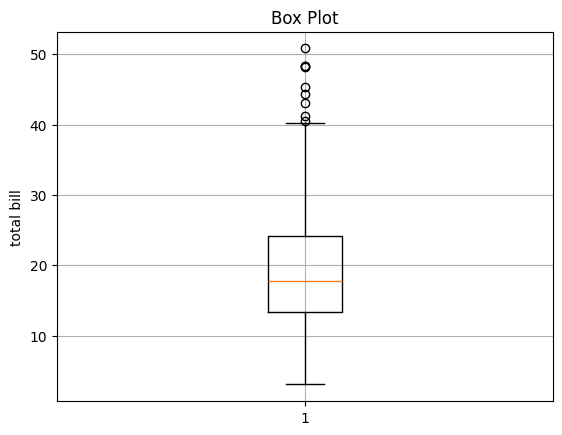

In [9]:
plt.boxplot(x=tips.total_bill)
plt.ylabel('total bill')
plt.title('Box Plot')
plt.grid()
plt.show()

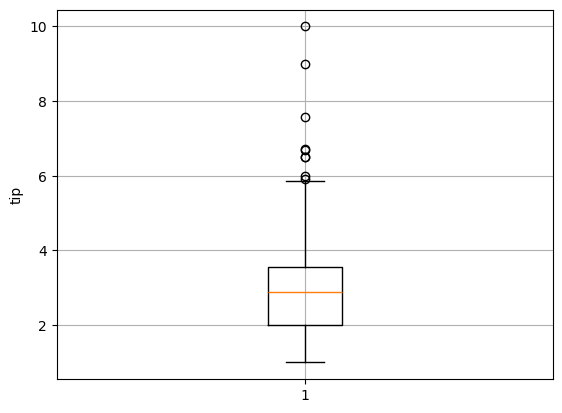

In [10]:
# 팁 box plot
plt.boxplot(x=tips.tip)
plt.grid()
plt.ylabel('tip')
plt.show()

In [11]:
tips.tip.describe()

,tip
count,244.000000
mean,2.998279
std,1.383638
min,1.000000
25%,2.000000
50%,2.900000
75%,3.562500
max,10.000000


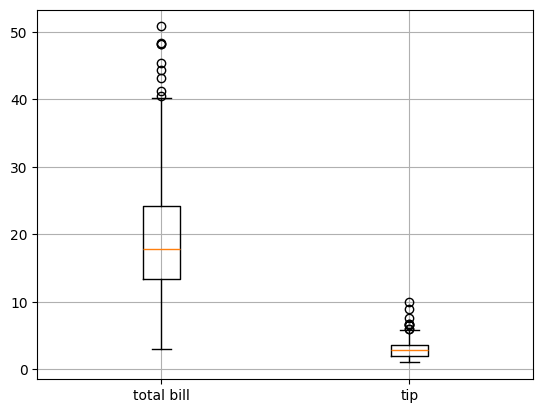

In [12]:
plt.boxplot(x=[tips.total_bill, tips.tip], tick_labels=['total bill', 'tip'])
plt.grid()
plt.show()

1개의 Figure 안에 2개의 Axes(Subplot)을 좌/우로 배치해서, 왼쪽에는 total_bill의 box plot을, 오른쪽에는 tip의 box plot을 시각화.

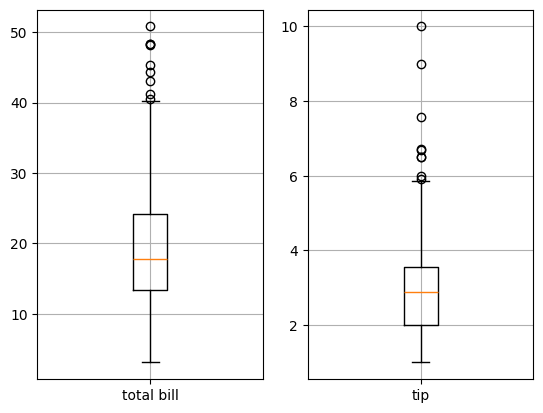

In [13]:
fig = plt.figure()  # Figure 객체 생성

ax1 = fig.add_subplot(1, 2, 1)  # Axes 객체 생성
ax2 = fig.add_subplot(122)  # Axes 객체 생성

ax1.boxplot(x=tips.total_bill, tick_labels=['total bill'])  # 첫번째 Axes에 box plot을 시각화
ax2.boxplot(x=tips.tip, tick_labels=['tip'])  # 두번째 Axes에 box plot을 시각화.

ax1.grid()
ax2.grid()

plt.show()

[<Axes: > <Axes: >]
<class 'numpy.ndarray'>


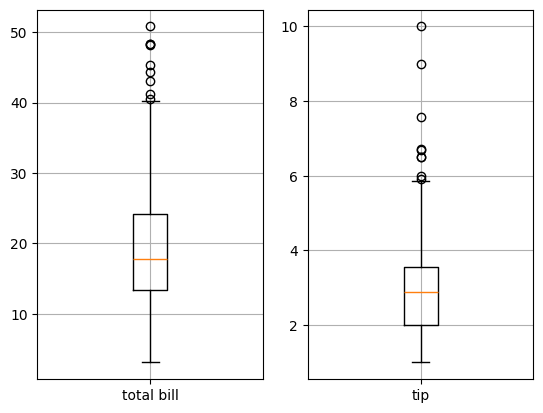

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
print(axes)  # axes: Axes 클래스 객체들을 저장하고 있는 배열(ndarray)
print(type(axes))

axes[0].boxplot(x=tips.total_bill, tick_labels=['total bill'])
axes[1].boxplot(x=tips.tip, tick_labels=['tip'])

axes[0].grid()
axes[1].grid()

plt.show()

## 성별 팁의 box plot

*   남성(Male) tip의 기술 통계량 출력
*   여성(Female) tip의 기술 통계량 출력
*   성별 tip의 box plot을 1개의 Axes에 시각화

In [15]:
male_tip = tips[tips.sex == 'Male'].tip
male_tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [16]:
female_tip = tips[tips.sex == 'Female'].tip
female_tip.describe()
# tips[tips.sex == 'Female'].tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


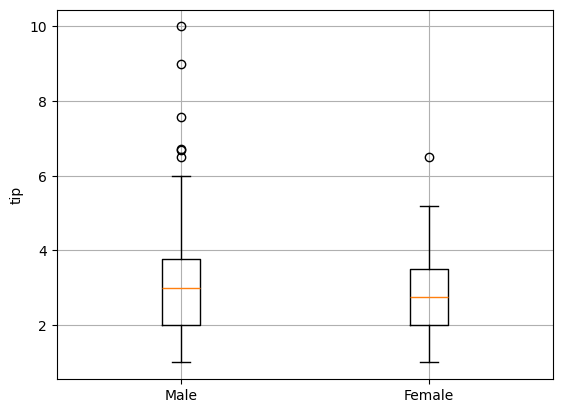

In [17]:
plt.boxplot(x=[male_tip, female_tip], tick_labels=['Male', 'Female'])
plt.ylabel('tip')
plt.grid()
plt.show()

## 시간(Lunch, Dinner)별 tip의 box plot

In [18]:
tips.time.unique()  # tips 데이터프레임에서 time 컬럼의 유일한(중복되지 않는) 값들.

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [19]:
tips.time.cat.categories  # time 카테코리(범주) 타입 변수의 카테고리(범주)들.

Index(['Lunch', 'Dinner'], dtype='object')

In [20]:
lunch_tip = tips[tips.time == 'Lunch'].tip
lunch_tip.describe()

,tip
count,68.000000
mean,2.728088
std,1.205345
min,1.250000
25%,2.000000
50%,2.250000
75%,3.287500
max,6.700000


In [21]:
dinner_tip = tips[tips.time == 'Dinner'].tip
dinner_tip.describe()

,tip
count,176.000000
mean,3.102670
std,1.436243
min,1.000000
25%,2.000000
50%,3.000000
75%,3.687500
max,10.000000


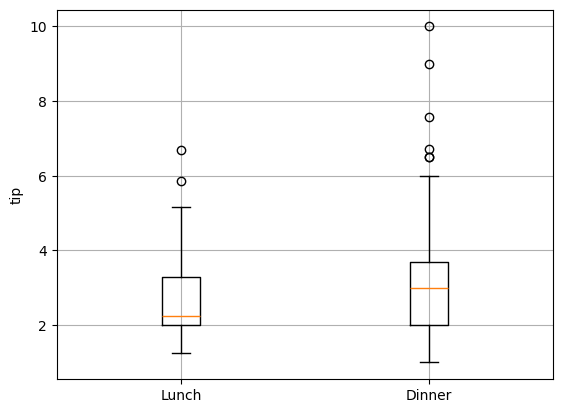

In [22]:
plt.boxplot(x=[lunch_tip, dinner_tip], tick_labels=['Lunch', 'Dinner'])
plt.grid()
plt.ylabel('tip')
plt.show()

## 요일(Thur, Fri, Sat, Sun)별 tip의 box plot

In [23]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [24]:
for d in tips.day.unique():
    print(d)

Sun
Sat
Thur
Fri


In [25]:
tips.day.cat.categories

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

In [26]:
for d in tips.day.cat.categories:
    print(d)

Thur
Fri
Sat
Sun


In [27]:
thur_tip = tips[tips.day == 'Thur'].tip
fri_tip = tips[tips.day == 'Fri'].tip
sat_tip = tips[tips.day == 'Sat'].tip
sun_tip = tips[tips.day == 'Sun'].tip

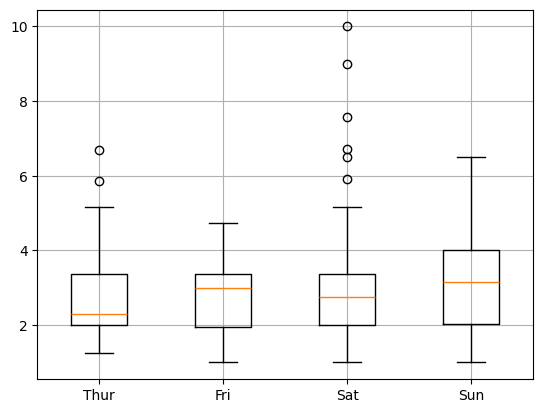

In [28]:
plt.boxplot(x=[thur_tip, fri_tip, sat_tip, sun_tip],
            tick_labels=tips.day.cat.categories)
plt.grid()
plt.show()

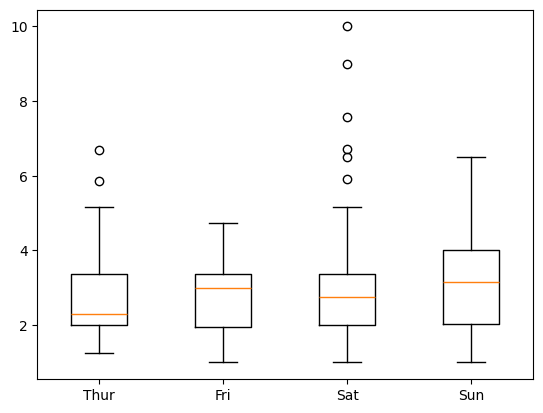

In [29]:
day_categroy = tips.day.cat.categories  # 요일 카테고리(목/금/토/일)
data = []  # 요일별 팁의 컬럼을 저장하기 위한 빈 리스트
for d in day_categroy:
    tip_by_day = tips[tips.day == d].tip
    data.append(tip_by_day)

plt.boxplot(x=data, tick_labels=day_categroy)
plt.show()

# Histogram(히스토그램)

연속형 자료(숫자 타입 데이터)를 구간으로 나눠서 그 구간 안에 포함된 자료의 개수를 막대로 표현한 그래프.

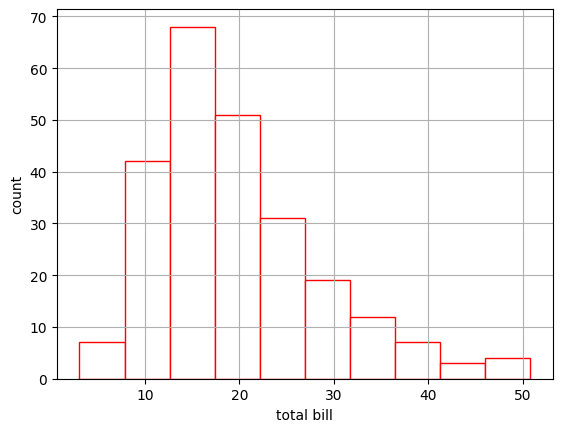

In [30]:
plt.hist(x=tips.total_bill,  # x: 히스토그램을 그리기 위한 연속형 자료(컬럼, 변수).
         bins=10,            # bins: 막대 개수 또는 구간.
         edgecolor='red',    # edgecolor: 막대 테두리 색깔.
         color='white')      # color: 막대 내부를 채우는 색깔.
plt.grid()
plt.xlabel('total bill')
plt.ylabel('count')
plt.show()

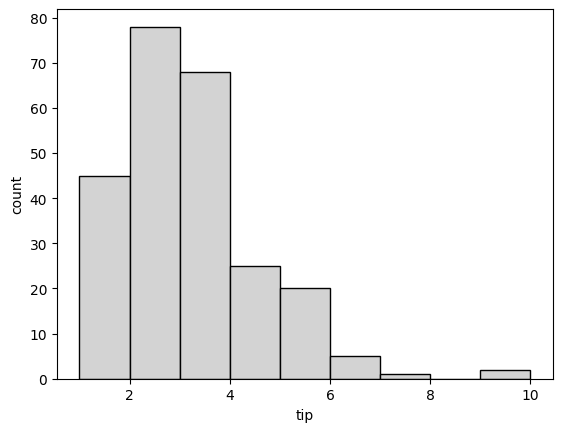

In [50]:
plt.hist(x=tips.tip, edgecolor='black', color='LightGray',
         bins=np.arange(1, 11))
plt.xlabel('tip')
plt.ylabel('count')
plt.show()

# Bar graph(막대 그래프)

카테고리(범주) 타입 변수(컬럼)의 빈도수를 막대로 표현한 그래프.

## 세로 막대 그래프(vertical bar graph)

In [32]:
gender_count = tips.sex.value_counts()
gender_count

,count
sex,
Male,157
Female,87


In [33]:
print(type(gender_count))  #> Series

<class 'pandas.core.series.Series'>


In [34]:
gender_count.values  #> 값(빈도수)들을 저장하고 있는 배열

array([157,  87])

In [35]:
gender_count.index  #> 인덱스를 저장하고 있는 배열.

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category', name='sex')

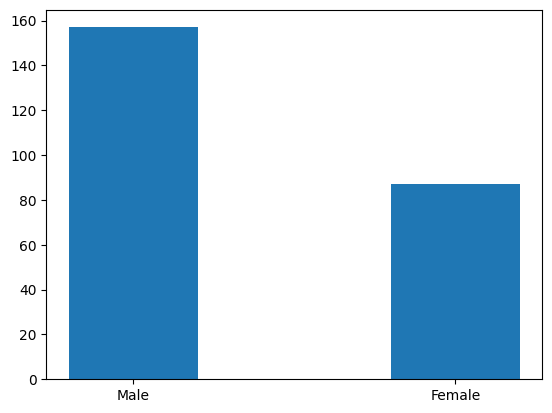

In [36]:
plt.bar(x=gender_count.index, height=gender_count.values, width=0.4)
plt.show()

## 가로 막대 그래프(horizontal var graph)

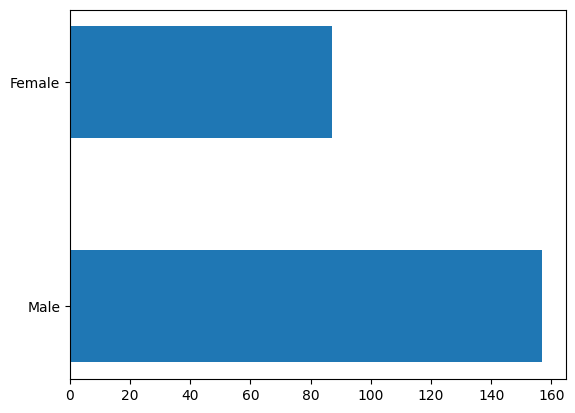

In [37]:
plt.barh(y=gender_count.index, width=gender_count.values, height=0.5)
plt.show()

size의 빈도수를 세로 막대 그래프로 시각화

In [38]:
size_count = tips['size'].value_counts()
size_count

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


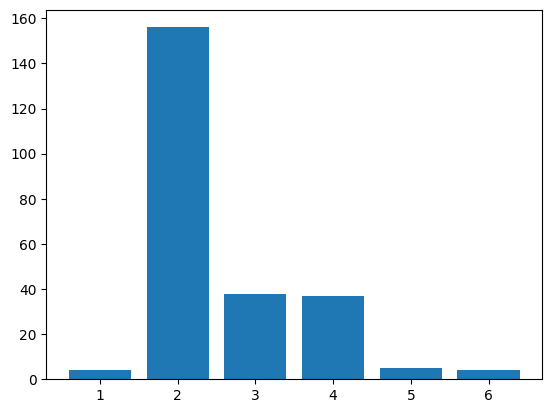

In [39]:
plt.bar(x=size_count.index, height=size_count.values)
plt.show()

요일(day) 빈도수를 가로 막대 그래프로 시각화.

In [40]:
day_count = tips.day.value_counts()
day_count

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


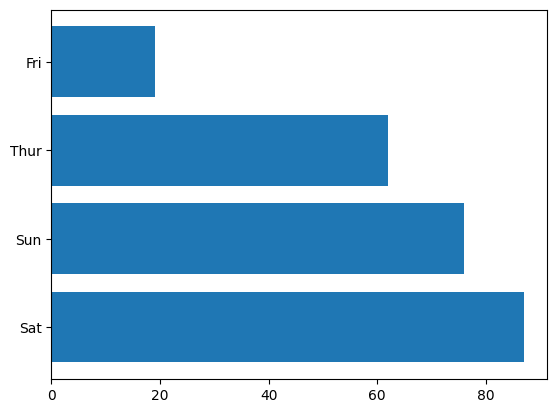

In [41]:
plt.barh(y=day_count.index, width=day_count.values)
plt.show()

*   4개의 Axes를 2x2 모양(nrows=2, ncols=2)으로 생성.
*   각각의 Axes에 성별 빈도수, 흡연여부 빈도수, 요일 빈도수, 시간 빈도수 (세로) 막대 그래프를 시각화.

In [42]:
gender_count = tips.sex.value_counts()  # 성별 빈도수
smoker_count = tips.smoker.value_counts()  # 흡연여부 빈도수
day_count = tips.day.value_counts()  # 요일 빈도수
time_count = tips.time.value_counts()  # 시간 빈도수

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


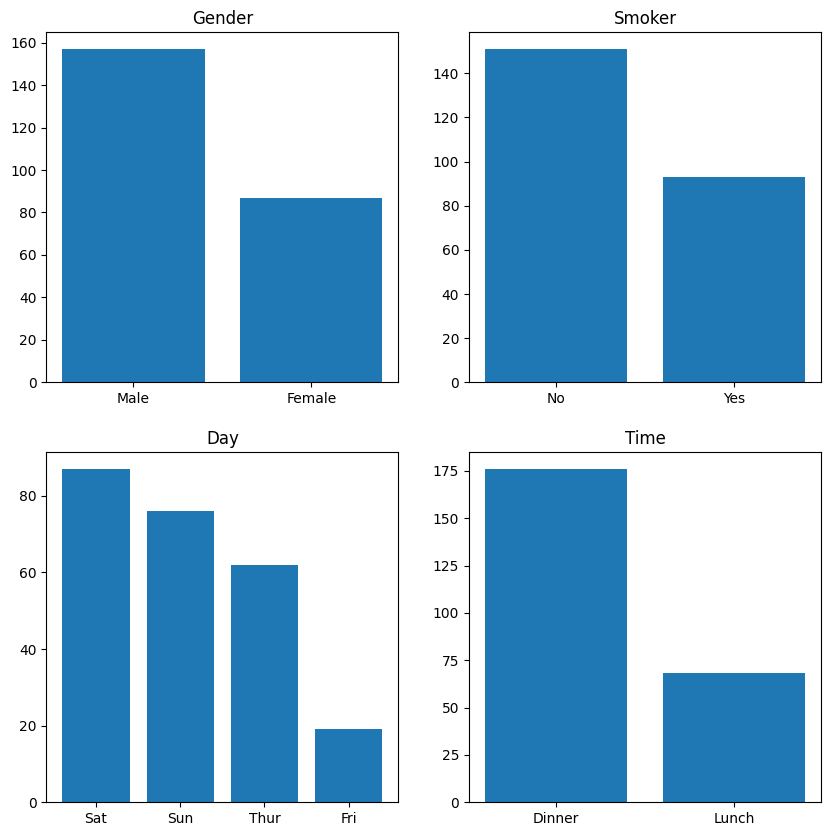

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
print(axes)  #> 2차원 배열(ndarray)

axes[0, 0].bar(x=gender_count.index, height=gender_count.values)
axes[0, 0].set_title('Gender')

axes[0, 1].bar(x=smoker_count.index, height=smoker_count.values)
axes[0, 1].set_title('Smoker')

axes[1, 0].bar(x=day_count.index, height=day_count.values)
axes[1, 0].set_title('Day')

axes[1, 1].bar(x=time_count.index, height=time_count.values)
axes[1, 1].set_title('Time')

plt.show()

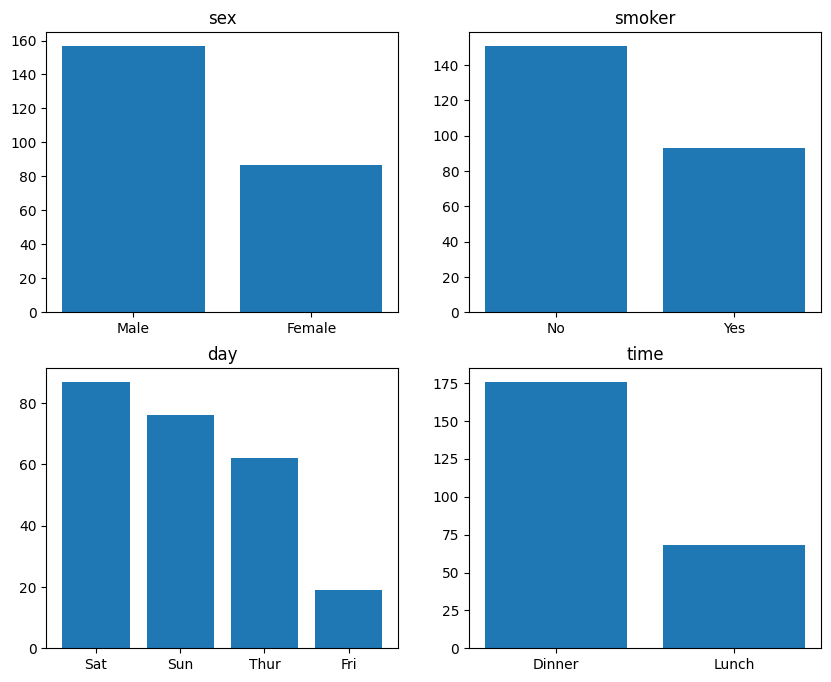

In [44]:
titles = [['sex', 'smoker'], ['day', 'time']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i, row in enumerate(titles):
    for j, t in enumerate(row):
        # print(i, j, t)
        data = tips[t].value_counts()
        axes[i, j].bar(x=data.index, height=data.values)
        axes[i, j].set_title(t)

plt.show()

# Scatter plot(산점도)

*   두 변수 간의 상관관계를 알고 싶을 때 사용.
*   `y ~ x` 관계 시각화.
    *   y: 관심변수, 종속변수
    *   x: 독립변수

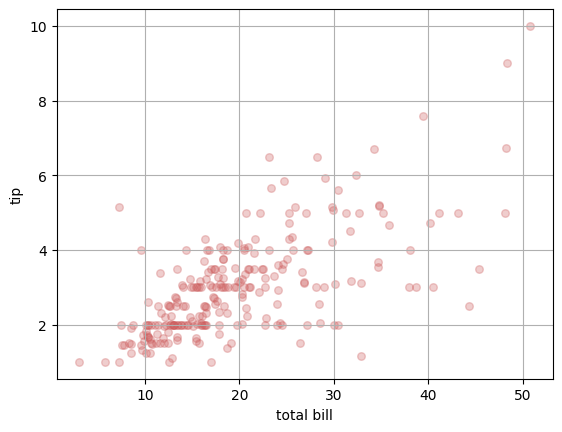

In [72]:
# tip(팁) ~ total_bill(영수증 총액) 관계
plt.scatter(x=tips.total_bill,  # x: x축에 사용할 변수(컬럼)
            y=tips.tip,         # y: y축에 사용할 변수
            alpha=0.3,          # alpha: 불투명도(0=투명, 1: 불투명)
            s=30,               # s: size. 마커(점)의 크기.
            c='IndianRed',      # c: color. 마커(점)의 색깔.
            marker='o')         # marker: 마커(점)의 모양(o, s, ^, v, *, +, ...)
plt.xlabel('total bill')
plt.ylabel('tip')
plt.grid()
plt.show()

*   tip ~ total_bill 상관관계를 산점도로 표현.
*   성별에 따라서 마커의 색깔을 다르게 표현.

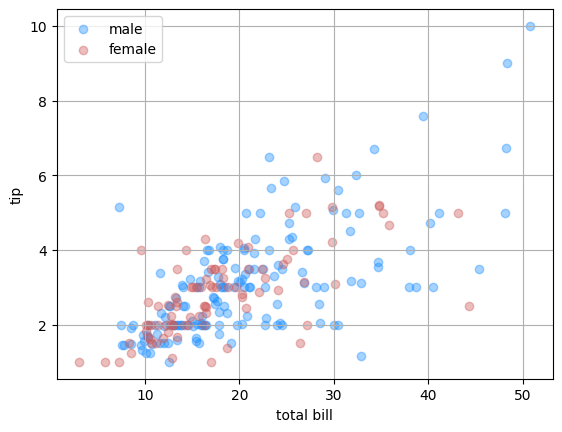

In [82]:
male_df = tips[tips.sex == 'Male']  # 성별이 남성인 데이터프레임
female_df = tips[tips.sex == 'Female']  # 성별이 여성인 데이터프레임

plt.scatter(x=male_df.total_bill, y=male_df.tip,
            alpha=0.4, c='DodgerBlue', label='male')
plt.scatter(x=female_df.total_bill, y=female_df.tip,
            alpha=0.4, c='IndianRed', label='female')

plt.xlabel('total bill')
plt.ylabel('tip')
plt.grid()
plt.legend()  # 범례 표시(scatter 함수의 label 파라미터 값을 표시).

plt.show()

*   tip ~ total_bill의 산점도
*   성별에 따라서 마커의 색깔을 다르게 표현
*   흡연여부에 따라서 마커의 모양을 다르게 표현

In [84]:
tips.sex.cat.categories

Index(['Male', 'Female'], dtype='object')

In [86]:
tips.smoker.cat.categories

Index(['Yes', 'No'], dtype='object')

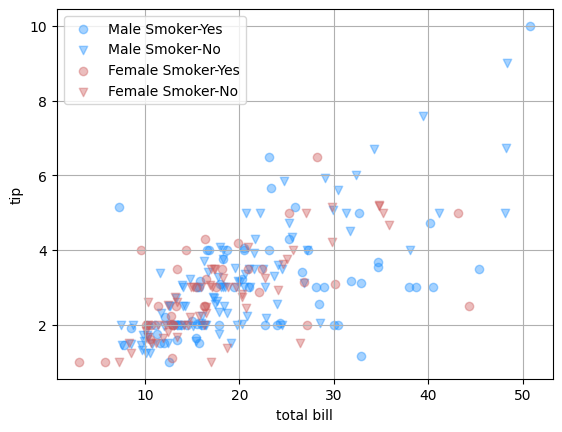

In [99]:
male_smoker = tips[(tips.sex == 'Male') & (tips.smoker == 'Yes')]  # 남성 흡연자
male_nonsmoker = tips[(tips.sex == 'Male') & (tips.smoker == 'No')]  # 남성 비흡연자
female_smoker = tips[(tips.sex == 'Female') & (tips.smoker == 'Yes')]  # 여성 흡연자
female_nonsmoker = tips[(tips.sex == 'Female') & (tips.smoker == 'No')]  # 여성 비흡연자

plt.scatter(x=male_smoker.total_bill, y=male_smoker.tip,
            alpha=0.4, c='DodgerBlue', marker='o', label='Male Smoker-Yes')
plt.scatter(x=male_nonsmoker.total_bill, y=male_nonsmoker.tip,
            alpha=0.4, c='DodgerBlue', marker='v', label='Male Smoker-No')
plt.scatter(x=female_smoker.total_bill, y=female_smoker.tip,
            alpha=0.4, c='IndianRed', marker='o', label='Female Smoker-Yes')
plt.scatter(x=female_nonsmoker.total_bill, y=female_nonsmoker.tip,
            alpha=0.4, c='IndianRed', marker='v', label='Female Smoker-No')

plt.legend()  # 범례 표시
plt.xlabel('total bill')
plt.ylabel('tip')
plt.grid()

plt.show()

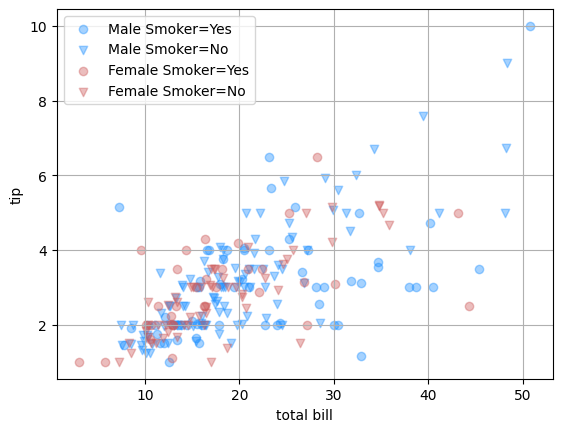

In [104]:
gender = tips.sex.cat.categories  # ['Male', 'Female']
smoker = tips.smoker.cat.categories  # ['Yes', 'No']
colors = ['DodgerBlue', 'IndianRed']
markers = ['o', 'v']

for g, c in zip(gender, colors):
    for s, m in zip(smoker, markers):
        df = tips[(tips.sex == g) & (tips.smoker == s)]
        plt.scatter(x=df.total_bill, y=df.tip, alpha=0.4,
                    c=c, marker=m, label=f'{g} Smoker={s}')

plt.legend()
plt.xlabel('total bill')
plt.ylabel('tip')
plt.grid()
plt.show()